In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
df = pd.read_csv("dataset.csv")
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [300]:
#Check for missing values
print("Missing values:")
print(df.isnull().sum())
print()
#There are no missing values

#Check sex, children, smoker and region columns for incorrect values(according to metadata)
print("sex"+":", df["sex"].unique())
print("children"+":", df["children"].unique())
print("smoker"+":", df["smoker"].unique())
print("region"+":", df["region"].unique())
print()
#There are no incorrect values for sex, children, smoker and region

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']



Min age: 18
Max age: 64


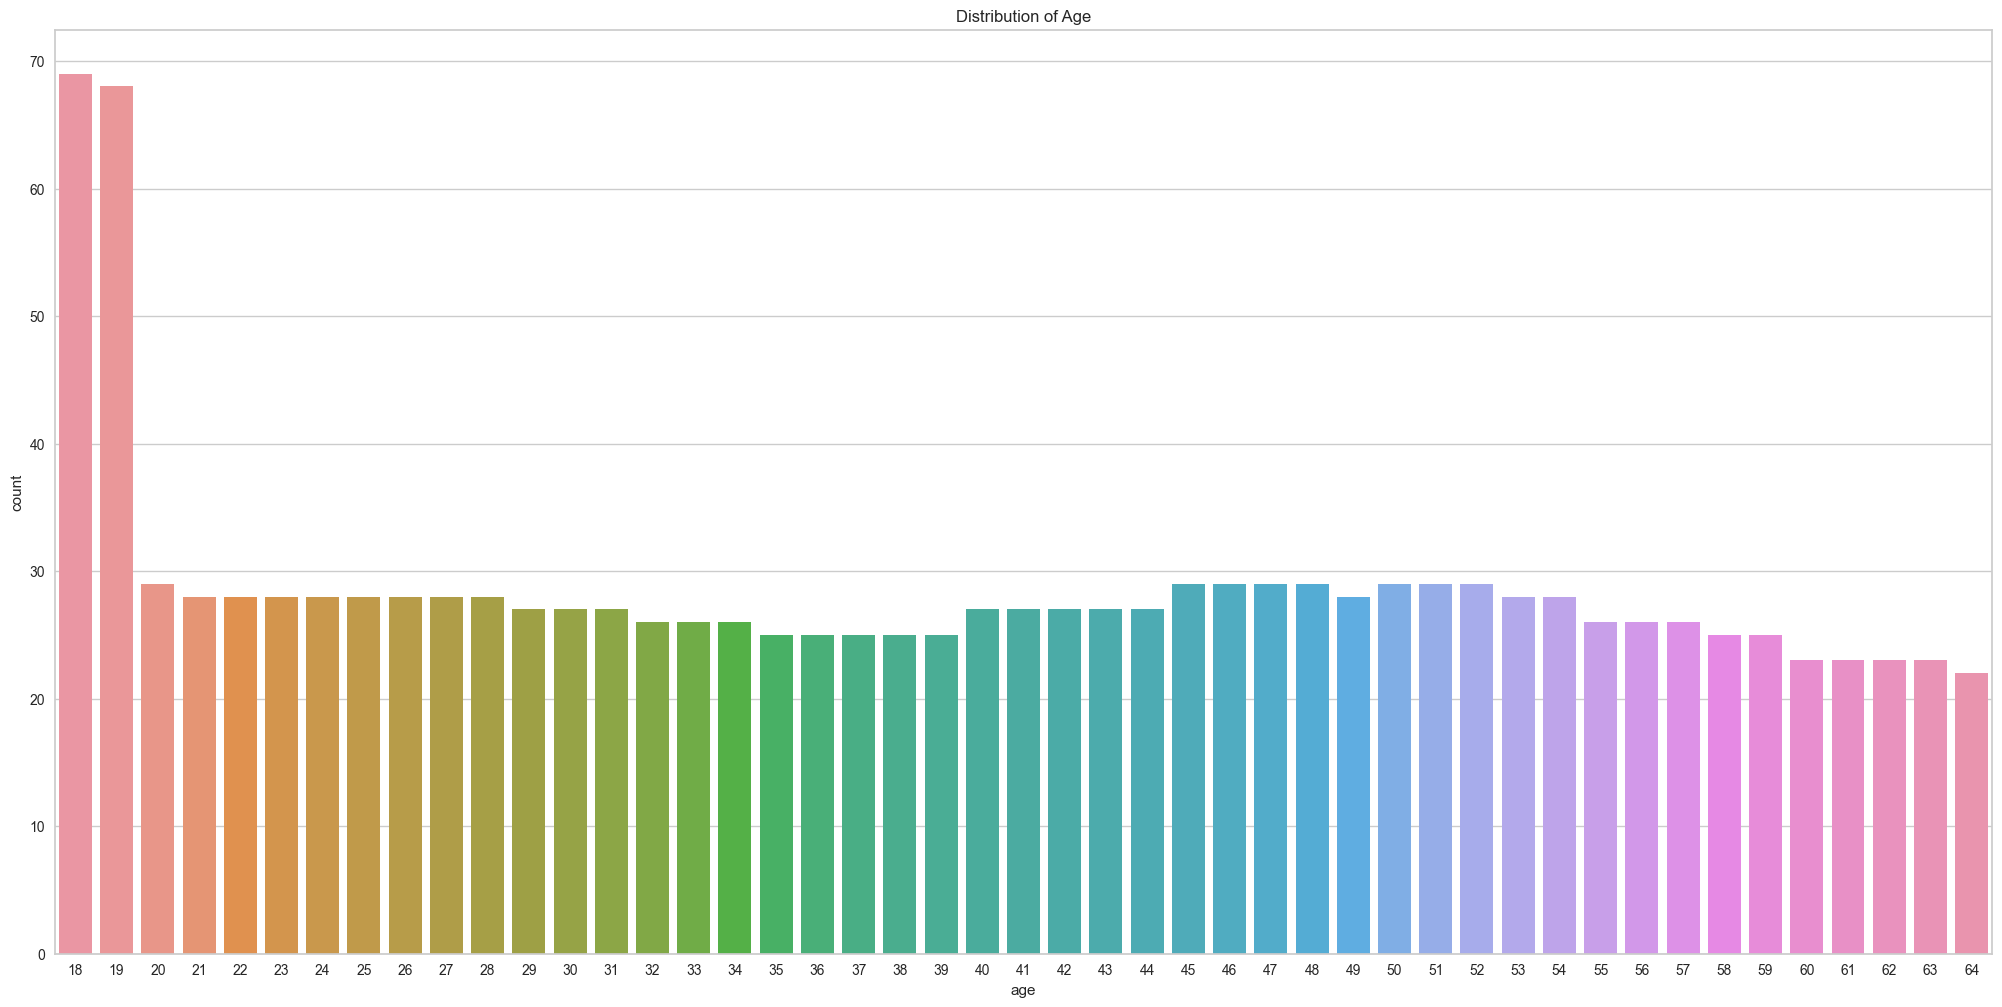

Min bmi: 15.96
Max bmi: 53.13


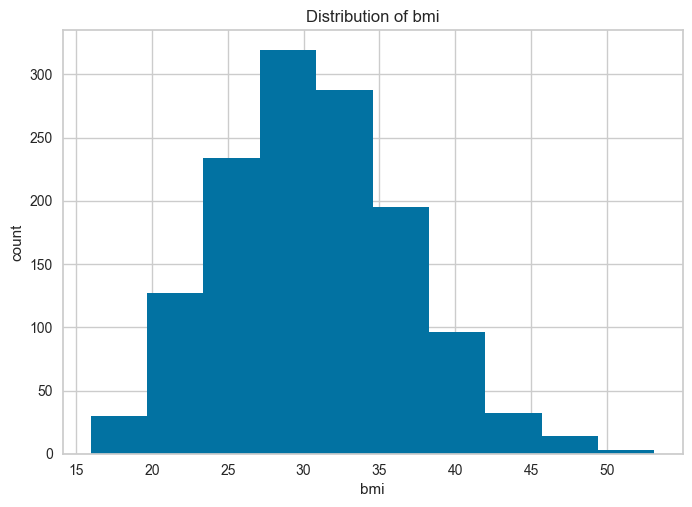

Min charges: 1121.8739
Max charges: 63770.42801


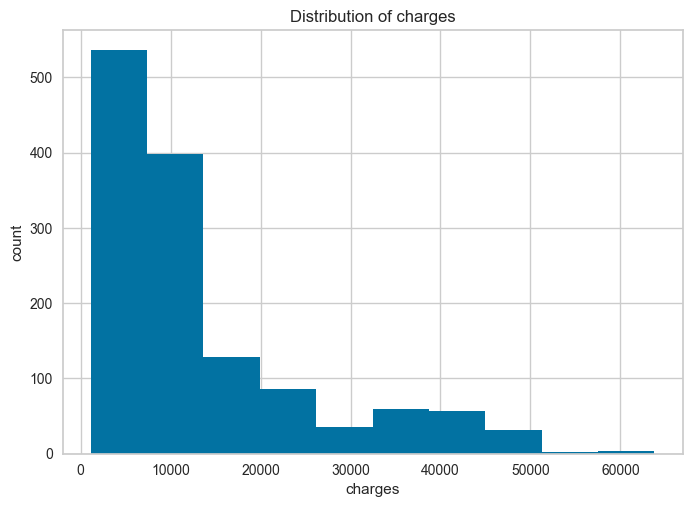

In [301]:
#Check age, bmi and charges for incorrect values(according to metadata)
#Age
print("Min age:", min(df['age']))
print("Max age:", max(df['age']))
#Range of age is correct
#Distribution of age
fig, ax = plt.subplots(figsize=(25,12))
sns.countplot(x='age', data=df, ax=ax)
ax.set_title("Distribution of Age")
plt.show()

#bmi
print("Min bmi:", min(df['bmi']))
print("Max bmi:", max(df['bmi']))
#Range of bmi is acceptable
#Distribution of bmi
fig, ax = plt.subplots()
ax.hist(df['bmi'])
ax.set_xlabel("bmi")
ax.set_ylabel("count")
ax.set_title("Distribution of bmi")
plt.show()

#Charges
print("Min charges:", min(df['charges']))
print("Max charges:", max(df['charges']))
#Distribution of charges
fig, ax = plt.subplots()
ax.hist(df['charges'])
ax.set_xlabel("charges")
ax.set_ylabel("count")
ax.set_title("Distribution of charges")
plt.show()

#There are no incorrect values for age, bmi and charges

In [302]:
#Creating dummy variables for nominal attributes
df = pd.get_dummies(df,drop_first=True)
#Print columns to see changes
print(df.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [303]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledDf = scaler.fit_transform(df)

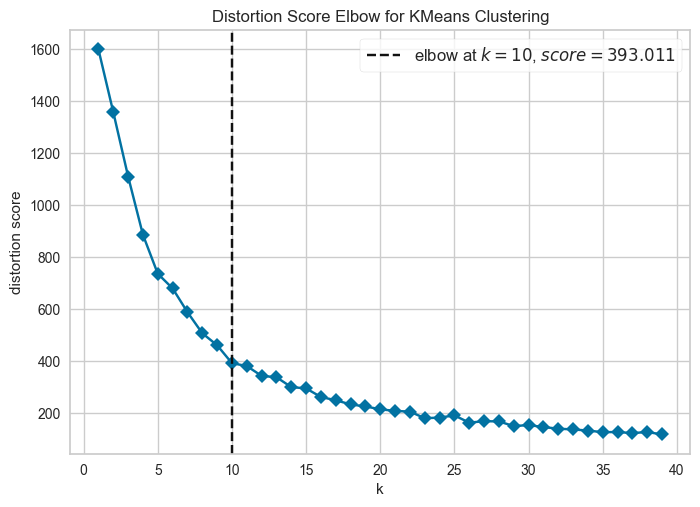

Optimal k: 10
Distortion score: 393.0108298702669


In [304]:
#K-Means Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Elbow curve
elbow = KElbowVisualizer(KMeans(n_init='auto'), k=(1,40), timings=False)
elbow.fit(scaledDf)
elbow.show()

#Finding optimal k
kmeans_optimal_k = elbow.elbow_value_
kmeans_distortion_score = elbow.elbow_score_
print("Optimal k:", kmeans_optimal_k)
print("Distortion score:", kmeans_distortion_score)

#Create the model for later use
kmeans = KMeans(n_clusters=kmeans_optimal_k, n_init='auto').fit(scaledDf)

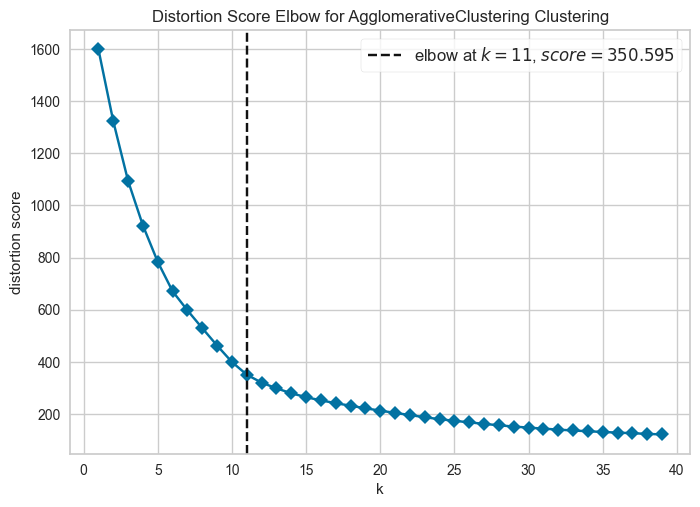

Optimal k: 11
Distortion score: 350.5951119100264


In [305]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

#Elbow curve
elbow = KElbowVisualizer(AgglomerativeClustering(), k=(1,40), timings=False)
elbow.fit(scaledDf)
elbow.show()

#Finding optimal k
agglomerative_optimal_k = elbow.elbow_value_
agglomerative_distortion_score = elbow.elbow_score_
print("Optimal k:", agglomerative_optimal_k)
print("Distortion score:", agglomerative_distortion_score)

#Create the model for later use
agglomerative = AgglomerativeClustering(n_clusters=agglomerative_optimal_k).fit(scaledDf)

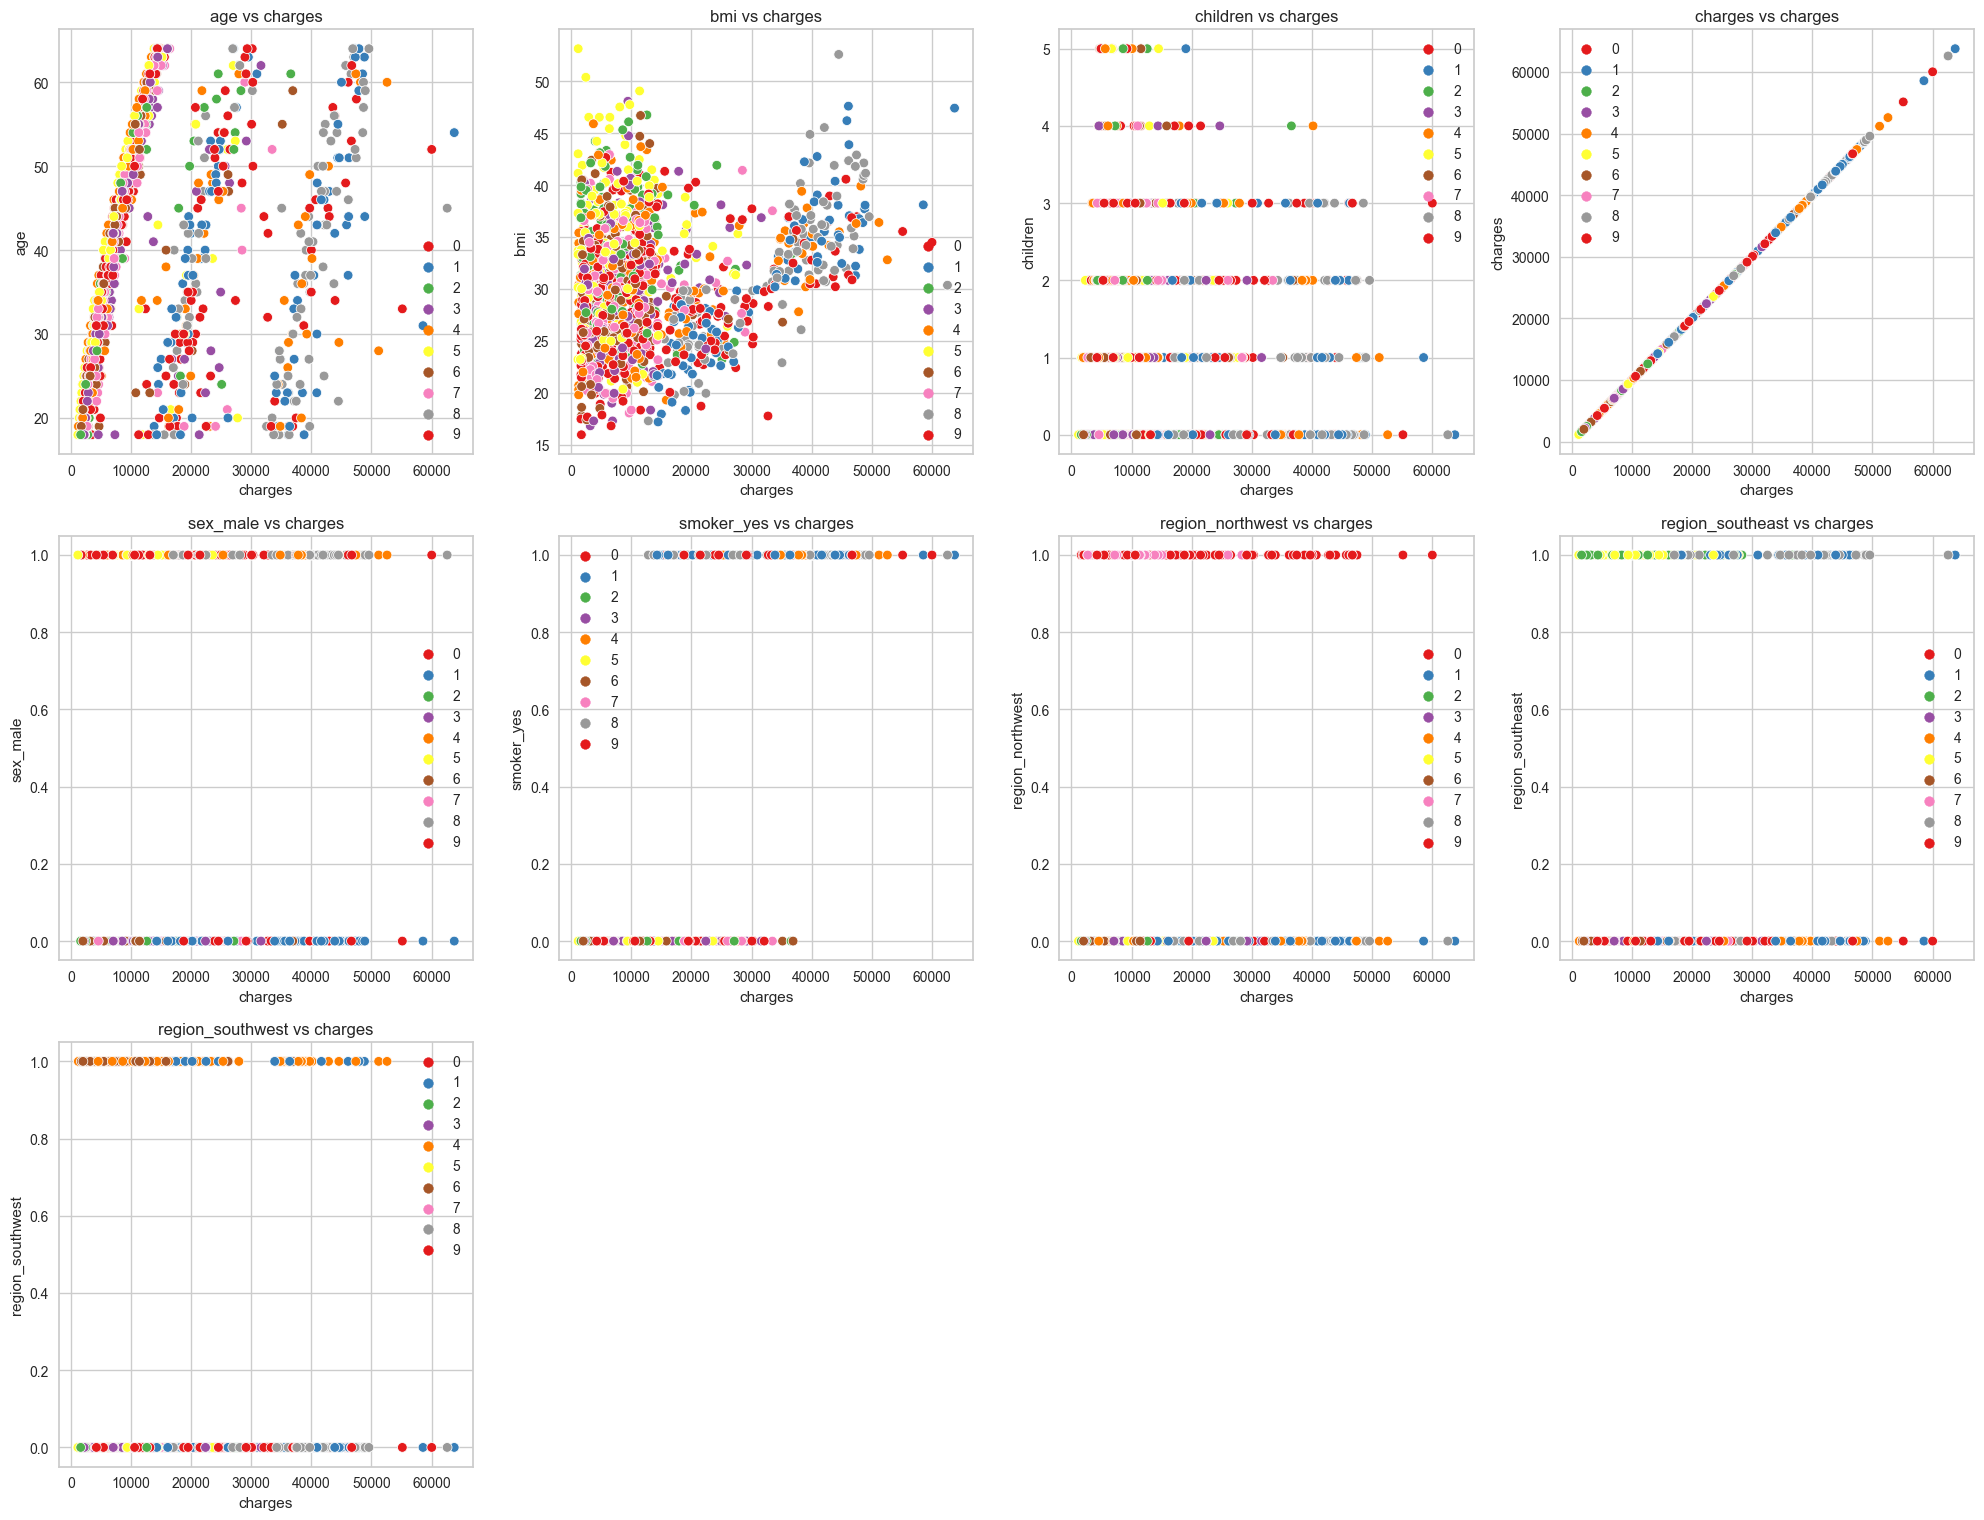

In [306]:
#Scatter plot all features vs charge attribute for k-means clustering.

fig = plt.figure(figsize=(20,20)) 
for i, col in enumerate(df.columns):
    ax = fig.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'], y=df[col], hue=kmeans.labels_, palette='Set1')
    ax.set_title(col+" vs charges")
    plt.ylabel(col)
fig.tight_layout()

#No relation can be seen in terms of clusters.

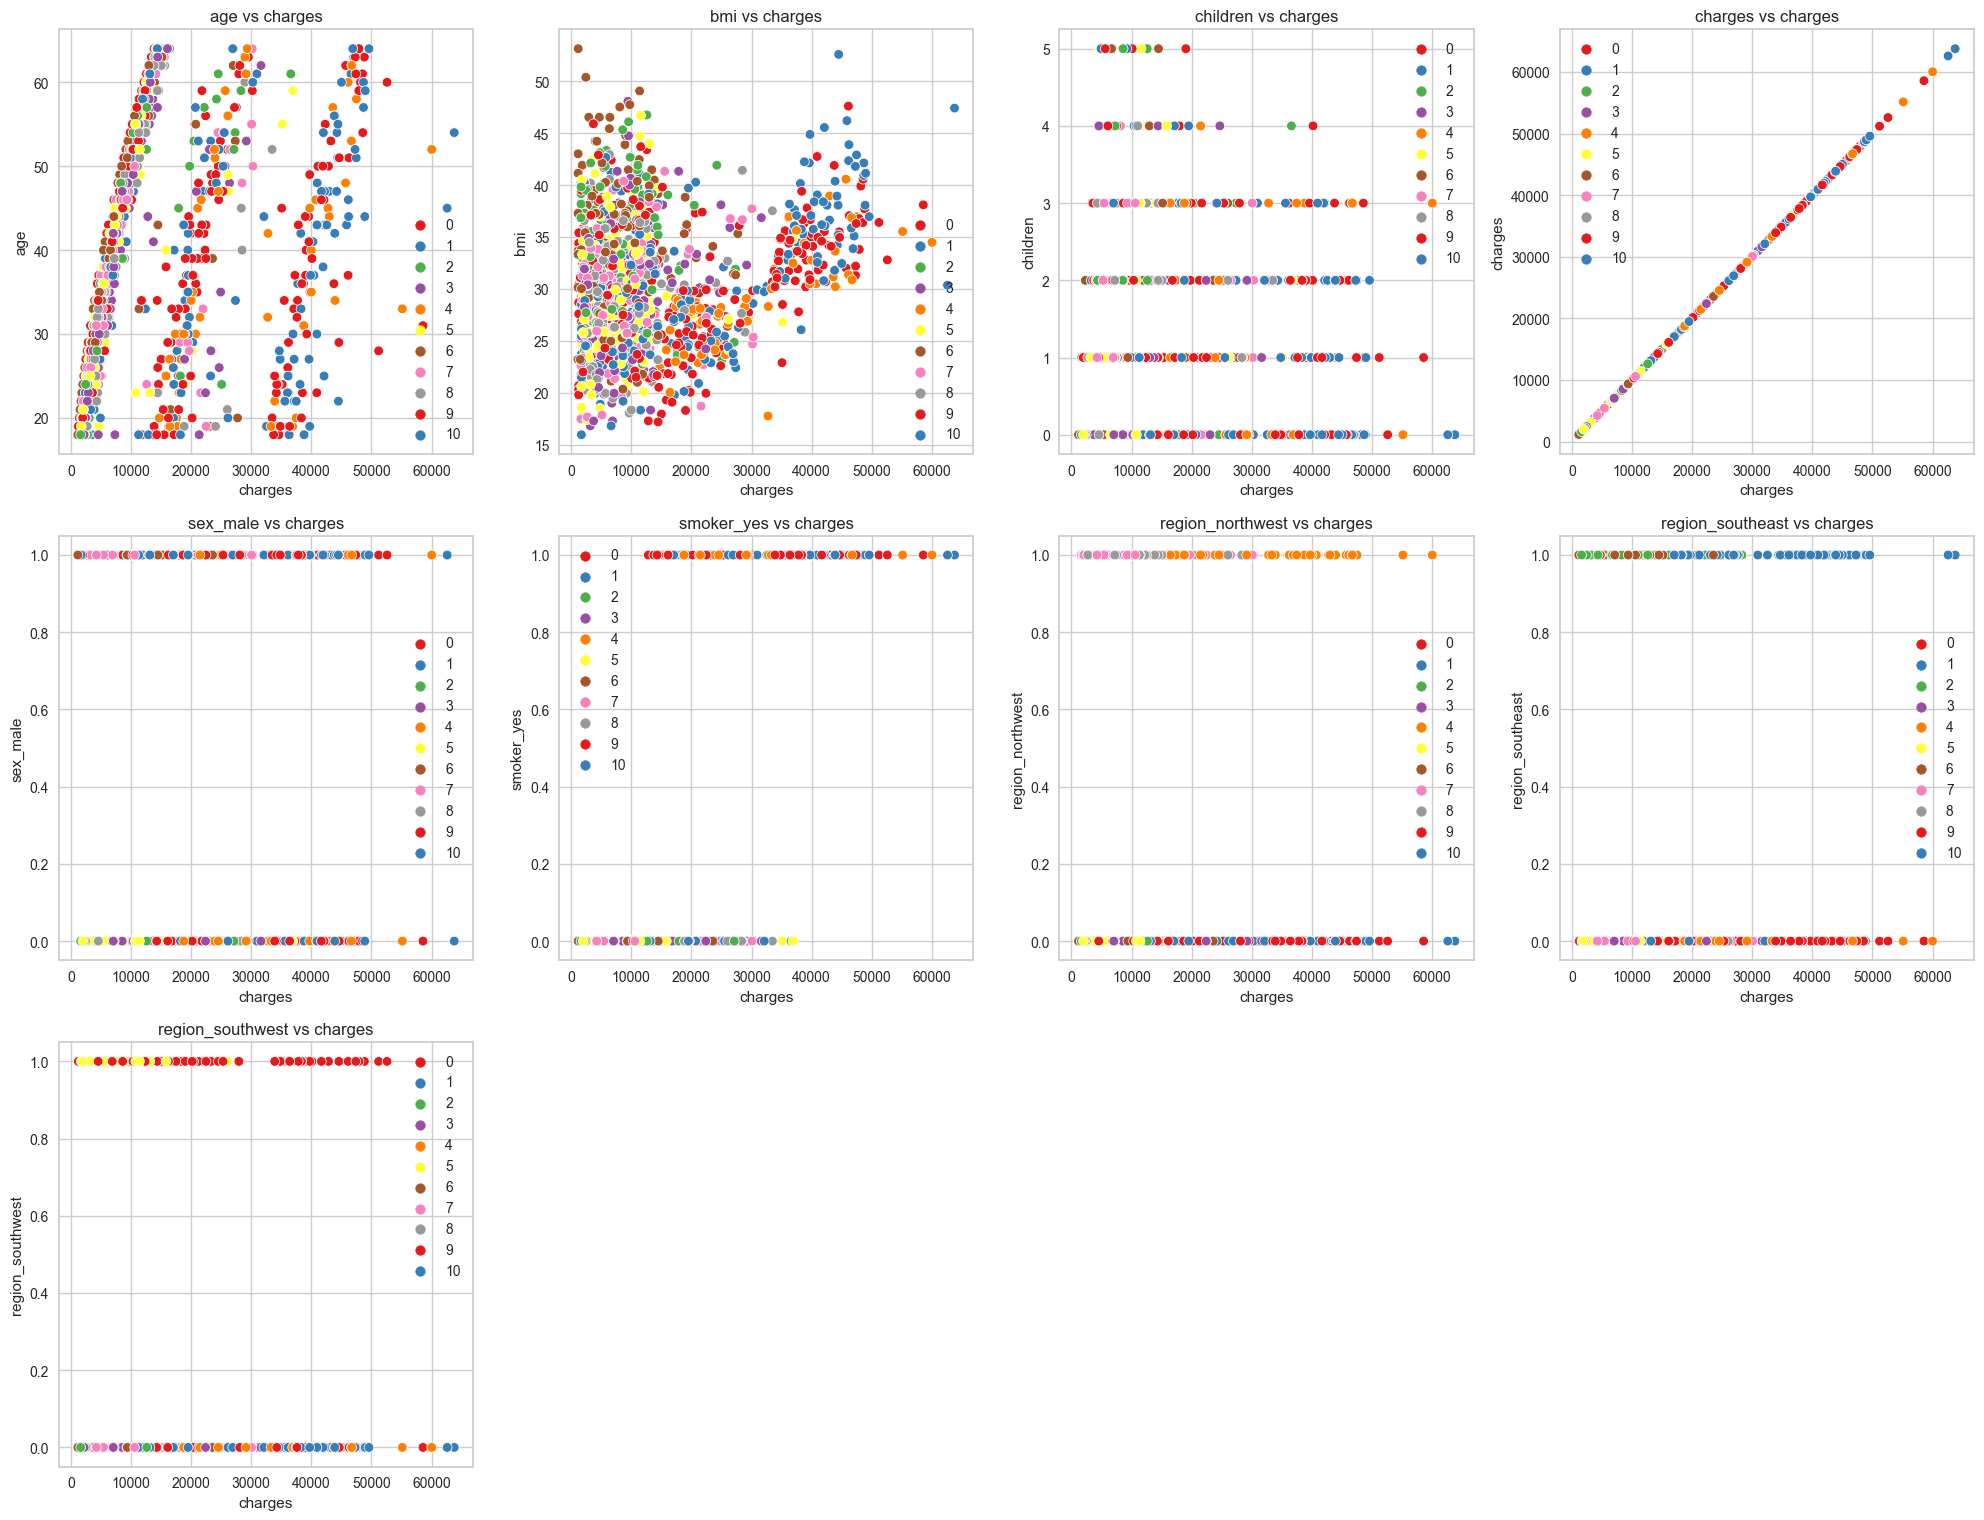

In [307]:
#Scatter plot all features vs charge attribute for agglomerative clustering.

fig = plt.figure(figsize=(20,20)) 
for i, col in enumerate(df.columns):
    ax = fig.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'], y=df[col], hue=agglomerative.labels_, palette='Set1')
    ax.set_title(col+" vs charges")
    plt.ylabel(col)
fig.tight_layout()

#No relation can be seen in terms of clusters.

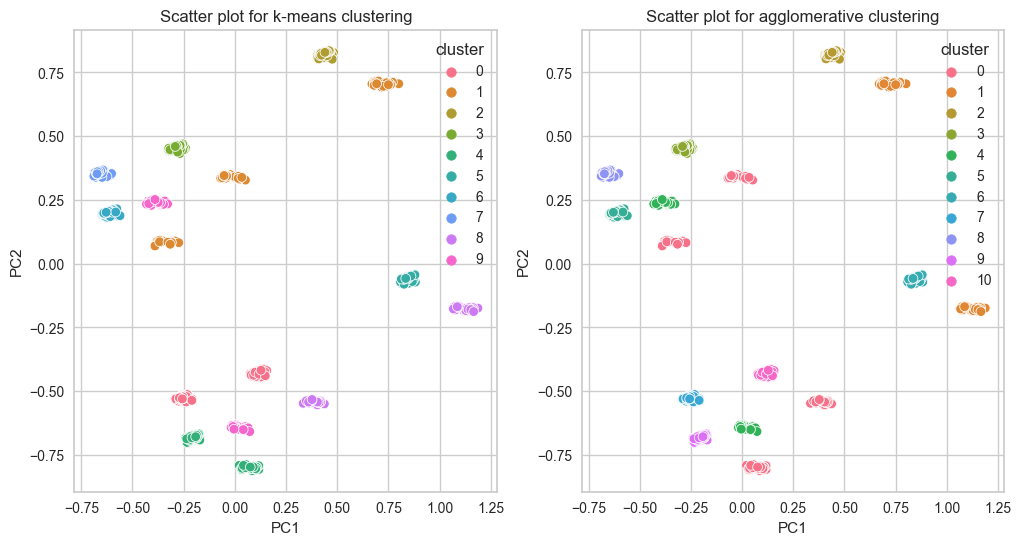

In [308]:
#To see clusters in scatter plot, reduce dimension with PCA
from sklearn.decomposition import PCA

#Reduce to two dimesions
pca = PCA(2)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

#Scatter plot for k-means clustering
pca_data = pd.DataFrame(pca.fit_transform(scaledDf),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data,ax=ax[0])
ax[0].set_title("Scatter plot for k-means clustering")

#Scatter plot for agglomerative clustering
pca_data = pd.DataFrame(pca.fit_transform(scaledDf),columns=['PC1','PC2'])
pca_data['cluster'] = pd.Categorical(agglomerative.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data,ax=ax[1])
ax[1].set_title("Scatter plot for agglomerative clustering")

plt.show()
#According to PCA, clusters are formed well, but there should be more clusters for both clustering algorithms.
#Agglomerative clustering has more clusters so it is better according to this visualisation.

K-Means Clustering
For 10 clusters, average silhouette_score is: 0.4005167736464308


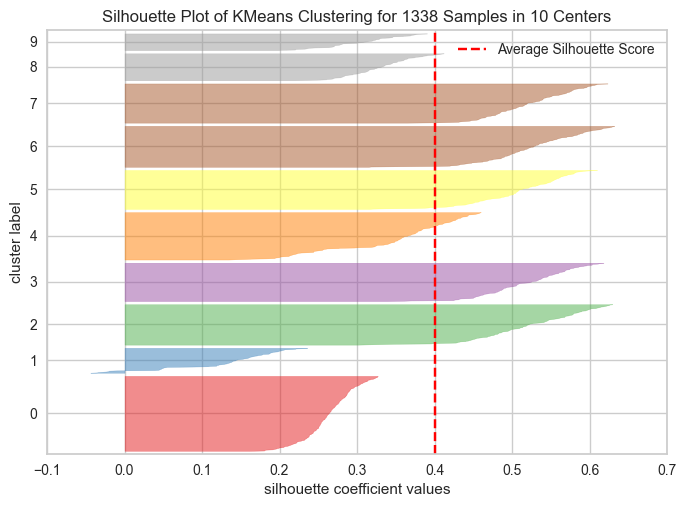

In [309]:
#Silhouette score for k-means clustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

#Average silhouette score
kmeans_silhouette_avg = silhouette_score(scaledDf, kmeans.labels_)
print("K-Means Clustering"),
print(f"For {kmeans_optimal_k} clusters, average silhouette_score is: {kmeans_silhouette_avg}")

#Silhouette score for all data points
visualizer = SilhouetteVisualizer(estimator=kmeans)
visualizer.fit(scaledDf)
visualizer.finalize()

Agglomerative Clustering
For 11 clusters, average silhouette_score is: 0.4521426865572585


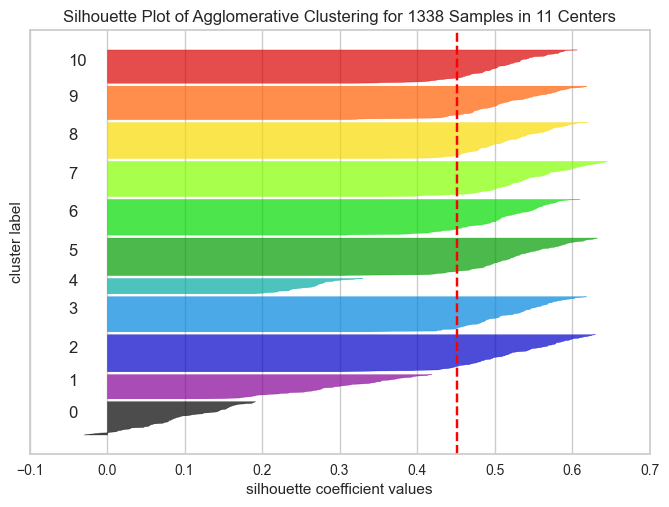

In [310]:
#Silhouette score for agglomerative clustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

fig, ax = plt.subplots()
#Average silhouette score
agglomerative_silhouette_avg = silhouette_score(scaledDf, agglomerative.labels_)
print("Agglomerative Clustering"),
print(f"For {agglomerative_optimal_k} clusters, average silhouette_score is: {agglomerative_silhouette_avg}")

#Silhouette score for all data points
sample_silhouette_values = silhouette_samples(scaledDf, agglomerative.labels_)
y_lower = 10
for i in range(agglomerative_optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[agglomerative.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / agglomerative_optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f"Silhouette Plot of Agglomerative Clustering for {agglomerative.labels_.size} Samples in {agglomerative_optimal_k} Centers")
ax.set_xlabel("silhouette coefficient values")
ax.set_ylabel("cluster label")
ax.axvline(x=agglomerative_silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.show()

#According to silhouette scores, agglomerative clustering is better.

In [311]:
comparison = pd.DataFrame([["K-means Clustering", kmeans_optimal_k , kmeans_distortion_score, kmeans_silhouette_avg],
                        ["Agglomerative Clustering", agglomerative_optimal_k , agglomerative_distortion_score, agglomerative_silhouette_avg]],
                        columns=["Model","Optimal K","Distortion Score","Silhouette Score"])
comparison
#Distortion scores, visualisations and silhouette scores considered:
#Agglomerative clustering is better than K-means clustering for this dataset.

,Model,Optimal K,Distortion Score,Silhouette Score
0,K-means Clustering,10,393.010830,0.400517
1,Agglomerative Clustering,11,350.595112,0.452143
